# Best Practices for Preprocessing Natural Language Data

In this notebook, we improve the quality of our Project Gutenberg word vectors by adopting best-practices for preprocessing natural language data.

**N.B.:** Some, all or none of these preprocessing steps may be helpful to a given downstream application. 

#### Load dependencies

In [1]:
# the initial block is copied from creating_word_vectors_with_word2vec.ipynb
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# new!
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases
from keras.preprocessing.text import one_hot

Using TensorFlow backend.


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### Load data

In [5]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [6]:
from nltk.corpus import gutenberg

In [7]:
gberg_sents = gutenberg.sents()

#### Iteratively preprocess a sentence

##### a tokenized sentence: 

In [8]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

##### to lowercase: 

In [9]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

##### remove stopwords and punctuation: 

In [10]:
stpwrds = stopwords.words('english') + list(string.punctuation)

In [11]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
[w.lower() for w in gberg_sents[4] if w not in stpwrds]

['she',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

##### stem words: 

In [13]:
stemmer = PorterStemmer()

In [14]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w not in stpwrds]

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

##### handle bigram collocations:

In [15]:
phrases = Phrases(gberg_sents) # train detector

In [16]:
bigram = Phraser(phrases) # create a more efficient Phraser object for transforming sentences

In [17]:
bigram.phrasegrams # output count and score of each bigram

{(b'two', b'daughters'): (19, 11.966813731181546),
 (b'her', b'sister'): (195, 17.7960829227865),
 (b"'", b's'): (9781, 31.066242737744524),
 (b'very', b'early'): (24, 11.01214147275924),
 (b'Her', b'mother'): (14, 13.529425062715127),
 (b'long', b'ago'): (38, 63.22343628984788),
 (b'more', b'than'): (541, 29.023584433996874),
 (b'had', b'been'): (1256, 22.306024648925288),
 (b'an', b'excellent'): (54, 39.063874851750626),
 (b'Miss', b'Taylor'): (48, 453.75918026073305),
 (b'very', b'fond'): (28, 24.134280468850747),
 (b'passed', b'away'): (25, 12.35053642325912),
 (b'too', b'much'): (173, 31.376002029426687),
 (b'did', b'not'): (935, 11.728416217142811),
 (b'any', b'means'): (27, 14.096964108090186),
 (b'wedding', b'-'): (15, 17.4695197740113),
 (b'Her', b'father'): (18, 13.129571562488772),
 (b'after', b'dinner'): (21, 21.5285481168817),
 (b'self', b'-'): (124, 47.79018053120332),
 (b'sixteen', b'years'): (12, 107.0461671612265),
 (b'five', b'years'): (42, 40.128755673408115),
 (b'ye

In [18]:
"Jon lives in New York City".split()

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [19]:
bigram["Jon lives in New York City".split()]

['Jon', 'lives', 'in', 'New_York', 'City']

#### Preprocess the corpus

In [20]:
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w not in list(string.punctuation)])

In [21]:
lower_sents[0:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [22]:
lower_bigram = Phraser(Phrases(lower_sents))

In [23]:
lower_bigram.phrasegrams # miss taylor, mr woodhouse, mr weston

{(b'two', b'daughters'): (19, 11.080802900992637),
 (b'her', b'sister'): (201, 16.93971298099339),
 (b'very', b'early'): (25, 10.516998773665177),
 (b'her', b'mother'): (253, 10.70812618607742),
 (b'long', b'ago'): (38, 59.226442015336005),
 (b'more', b'than'): (562, 28.529926612065935),
 (b'had', b'been'): (1260, 21.583193129694834),
 (b'an', b'excellent'): (58, 37.41859680854167),
 (b'sixteen', b'years'): (15, 131.42913000977515),
 (b'miss', b'taylor'): (48, 420.4340982546865),
 (b'mr', b'woodhouse'): (132, 104.19907841850323),
 (b'very', b'fond'): (30, 24.185726346489627),
 (b'passed', b'away'): (25, 11.751473221742694),
 (b'too', b'much'): (177, 30.36309017383541),
 (b'did', b'not'): (977, 10.846196223896685),
 (b'any', b'means'): (28, 14.294148100212627),
 (b'after', b'dinner'): (22, 18.60737125272944),
 (b'mr', b'weston'): (162, 91.63290824201266),
 (b'five', b'years'): (42, 37.66428596665674),
 (b'years', b'old'): (176, 48.599094446190286),
 (b'seven', b'years'): (53, 50.3345604

In [24]:
lower_bigram["jon lives in new york city".split()]

['jon', 'lives', 'in', 'new_york', 'city']

In [25]:
lower_bigram = Phraser(Phrases(lower_sents, min_count=32, threshold=64))
lower_bigram.phrasegrams

{(b'miss', b'taylor'): (48, 156.44059469941823),
 (b'mr', b'woodhouse'): (132, 82.04651843976633),
 (b'mr', b'weston'): (162, 75.87438262077481),
 (b'mrs', b'weston'): (249, 160.68485093258923),
 (b'great', b'deal'): (182, 93.36368125424357),
 (b'mr', b'knightley'): (277, 161.74131790625913),
 (b'miss', b'woodhouse'): (173, 229.03802722366902),
 (b'years', b'ago'): (56, 74.31594785893046),
 (b'mr', b'elton'): (214, 121.3990121932397),
 (b'dare', b'say'): (115, 89.94000515807346),
 (b'frank', b'churchill'): (151, 1316.4456593286038),
 (b'miss', b'bates'): (113, 276.39588291692513),
 (b'drawing', b'room'): (49, 84.91494947493561),
 (b'mrs', b'goddard'): (58, 143.57843432545658),
 (b'miss', b'smith'): (58, 73.03442128232508),
 (b'few', b'minutes'): (86, 204.16834974753786),
 (b'john', b'knightley'): (58, 83.03755747111268),
 (b'don', b't'): (830, 250.30957446808512),
 (b'good', b'natured'): (66, 88.69936184891343),
 (b'few', b'moments'): (43, 107.77584531675087),
 (b'thousand', b'pounds')

In [26]:
# as in Maas et al. (2001):
# - leave in stop words ("indicative of sentiment")
# - no stemming ("model learns similar representations of words of the same stem when data suggests it")
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [27]:
clean_sents[0:9]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

In [28]:
clean_sents[6] # could consider removing stop words or common words

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

#### Run word2vec

In [29]:
# max_vocab_size can be used instead of min_count (which has increased here)
# model = Word2Vec(sentences=clean_sents, size=64, sg=1, window=10, min_count=10, seed=42, workers=8)
# model.save('clean_gutenberg_model.w2v')

#### Explore model

In [30]:
# skip re-training the model with the next line:  
model = gensim.models.Word2Vec.load('clean_gutenberg_model.w2v')

In [31]:
len(model.wv.vocab) # down from 17k in previous notebook

10329

In [33]:
model.wv['ma_am']

array([-0.05676253,  0.07844435,  0.52027446,  0.37320644, -0.24255292,
        0.30856162, -0.70227146, -0.27409875,  0.38439986,  0.6108922 ,
        0.6876027 ,  0.8553475 ,  0.19081767, -0.01787589, -0.46824324,
       -0.3627119 ,  0.24631238,  0.43311304,  0.38393936, -0.72331214,
        0.00363758, -0.0442424 , -0.20799655,  0.7160002 ,  0.16939896,
       -0.21902184,  0.00161093,  0.33641648,  0.29330483,  0.05802616,
       -0.6848613 , -0.1804067 , -0.03038737, -0.01894402,  0.19974022,
       -0.03917995, -0.26051706, -0.18670781, -0.01105823,  0.16439915,
       -0.3045605 , -0.6293359 ,  0.57539994, -0.36910287,  0.37193906,
        0.10716227, -0.30892137,  0.07860265,  0.15282175, -0.09202585,
        0.09529802, -0.18646833,  0.19422849,  0.02903883, -0.11231492,
        0.21328439, -0.37346926,  0.00908399,  0.08015801,  0.04756419,
       -0.00355227, -0.3417816 ,  0.38215277, -0.08477065], dtype=float32)

In [34]:
model.wv.most_similar('ma_am') 

[('betty', 0.8597646951675415),
 ('madam', 0.8378130197525024),
 ('mamma', 0.8358209133148193),
 ('m_sure', 0.8303756713867188),
 ('shouldn', 0.8235957622528076),
 ('nancy', 0.8226490616798401),
 ('sha', 0.8166635632514954),
 ("'--", 0.813730001449585),
 ('"--', 0.8126052618026733),
 ('bunger', 0.808783233165741)]

In [35]:
# swap woman and man
model.wv.most_similar(positive=['ma_am', 'man'], negative=['woman']) 

[("'--", 0.7404119968414307),
 ('hatter', 0.7372102737426758),
 ('doctor', 0.7280628681182861),
 ('bullet', 0.715572714805603),
 ('todhunter', 0.7096686363220215),
 ('anyhow', 0.6979916095733643),
 ('little_jackal', 0.6868457198143005),
 ('turnbull', 0.6862760186195374),
 ('hutton', 0.6847325563430786),
 ('----"', 0.6840251684188843)]

In [36]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man']) 

[('wife', 0.7665059566497803),
 ('mother', 0.7607145309448242),
 ('daughter', 0.7487930059432983),
 ('sister', 0.7375385761260986),
 ('husband', 0.7347874045372009),
 ('sarah', 0.703561544418335),
 ('nurse', 0.6884477734565735),
 ('rachel', 0.6795073747634888),
 ('child', 0.6755642890930176),
 ('brother', 0.6752834916114807)]

#### Reduce word vector dimensionality with t-SNE

In [37]:
tsne = TSNE(n_components=2, n_iter=1000)

In [39]:
X_2d = tsne.fit_transform(model.wv[model.wv.vocab])

In [40]:
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [41]:
coords_df.head()

,x,y,token
0,-60.596306,26.084209,emma
1,3.924757,47.924988,by
2,-58.700150,28.264816,jane
3,-1.870368,12.516601,volume
4,-22.277899,6.176891,i


In [42]:
# coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

#### Visualise 

In [43]:
coords_df = pd.read_csv('clean_gutenberg_tsne.csv')

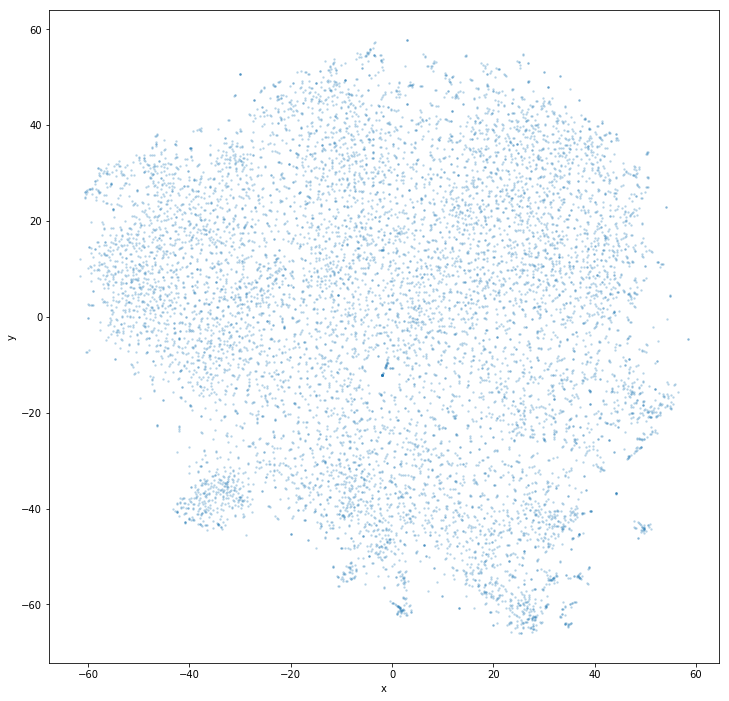

In [44]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [45]:
output_notebook()

Loading BokehJS ...

In [46]:
subset_df = coords_df.sample(n=5000)

In [47]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [48]:
show(p)

In [50]:
# output_file() here